In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.978474
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

<Axes: >

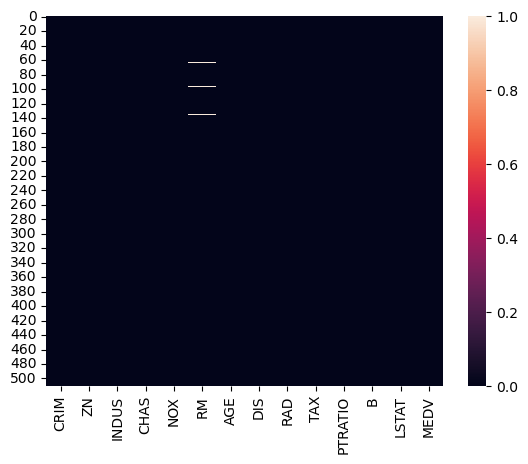

In [5]:
sb.heatmap(df.isnull())

In [6]:
a=df['RM'].mean()
a

6.287588932806324

In [7]:
df['RM'].fillna(a,inplace=True)

<Axes: >

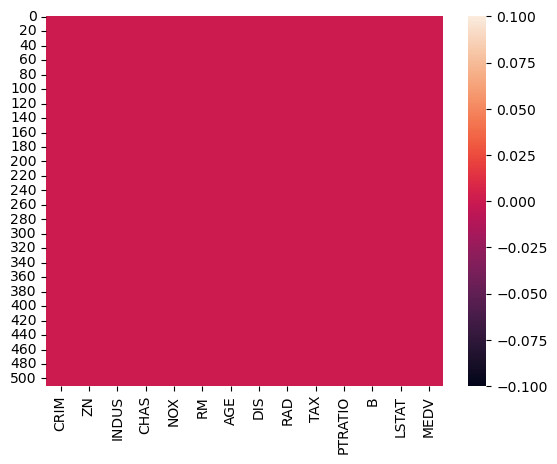

In [8]:
sb.heatmap(df.isnull())

<Axes: >

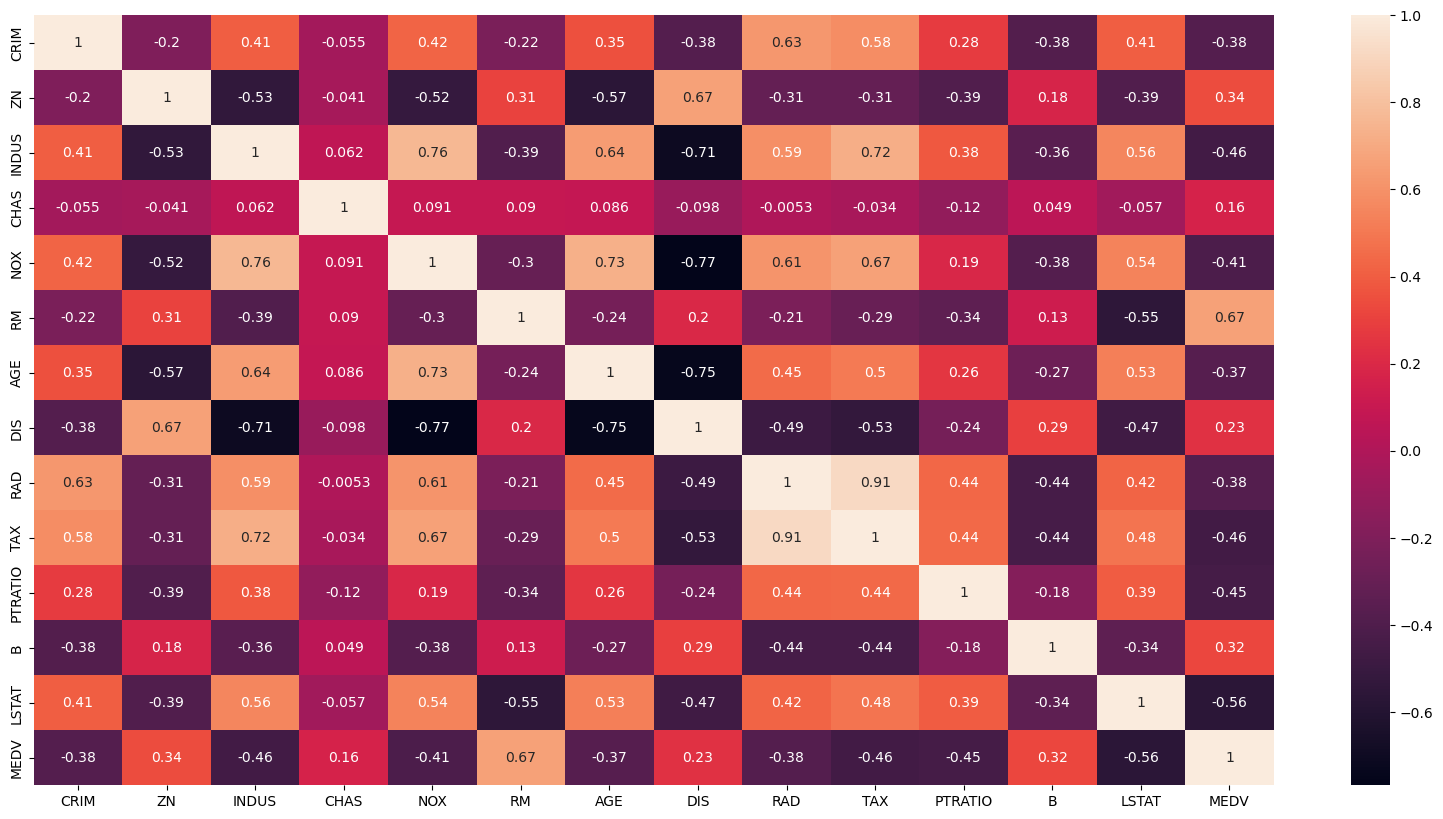

In [9]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot=True)

In [10]:
X=df.drop(['RAD','MEDV'],axis=1)
Y=df['MEDV']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
X_train.shape

(357, 12)

In [13]:
X_test.shape

(154, 12)

In [14]:
Y_train.shape

(357,)

In [15]:
Y_test.shape

(154,)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)


In [17]:
X_test=ss.transform(X_test)

In [18]:
X_train

array([[-0.4299804 ,  0.63160121, -0.91440378, ...,  0.54427184,
         0.22629536,  0.14790315],
       [ 0.96424356, -0.47229398,  0.98683949, ...,  0.77356739,
        -0.75580721,  0.10617357],
       [-0.44689447,  2.83939158, -1.2339651 , ..., -0.09775569,
         0.42548523, -1.09416566],
       ...,
       [ 0.23920306, -0.47229398,  0.98683949, ...,  0.77356739,
         0.43989954,  0.75298213],
       [-0.41134534, -0.47229398, -0.75755487, ..., -0.51048768,
         0.21120005, -0.28903015],
       [-0.44073013, -0.47229398, -0.79273594, ...,  0.31497629,
         0.43989954, -0.54799904]])

In [19]:
X_test

array([[-0.42322322, -0.47229398, -0.65347756, ..., -0.28119213,
         0.39268416,  0.68302371],
       [-0.44648359, -0.47229398, -1.02287872, ...,  0.13153986,
         0.31210023, -0.33198707],
       [-0.44907447,  3.5017287 , -1.23103334, ..., -1.47352898,
         0.41515687, -0.66091438],
       ...,
       [-0.23486518, -0.47229398,  1.20378937, ..., -1.74868364,
         0.35715913, -1.38872743],
       [-0.33410269, -0.47229398, -0.47317462, ...,  1.14044027,
         0.4131139 ,  0.8155765 ],
       [-0.37620826, -0.47229398, -0.47317462, ...,  1.14044027,
         0.43989954, -0.61059341]])

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
m=lr.coef_
m

array([-1.0103259 ,  1.46244856, -0.46856525,  1.186164  , -1.73844494,
        4.3717729 , -1.95645133, -3.94935553, -0.52524187, -1.0480224 ,
        0.86624425, -0.18036527])

In [22]:
c=lr.intercept_
c

22.54481792717087

In [23]:
ypred=lr.predict(X_test)
ypred

array([18.9036261 , 16.67402567, 35.16557257, 27.81109443, 22.78261812,
       23.36295909, 26.76893305, 35.84336557, 18.88057696, 33.138728  ,
       22.4166525 , 36.98646843, 24.48650761, 12.40388322, 24.39335374,
       21.79453481, 27.23438036, 12.57121365, 22.9364752 , 28.18705174,
       26.38973386, 26.50273383, 34.0097449 , 25.49932955, 14.51164911,
       13.32174073, 20.64425361, 15.69831006, 26.57688128, 16.03825972,
       17.64182033, 18.36011497, 17.31457827, 20.55369254, 21.37248524,
       17.32593066, 19.82642781, 20.3669811 , 16.8534053 , 27.53039812,
       10.7722656 , 18.32819682, 21.96839328, 20.91681613, 37.96656231,
       35.48949938, 39.99388723, 12.97810851, 30.57064728, 44.98352115,
       27.08601385, 18.71606482, 17.72490215, 21.85417834, 22.72362901,
       24.7383936 , 20.76839505, 34.74375276, 21.29930967, 30.85438896,
       35.42333286, 18.36775372, 26.74431106, 23.49606907, 21.83149829,
       19.89741004, 15.18730929, 36.89525393, 21.68052438, 28.16

In [24]:
dict={'Actual output':Y_test,"Predictoupt":ypred}
df1=pd.DataFrame(dict)
df1

,Actual output,Predictoupt
47,16.6,18.903626
345,17.5,16.674026
284,32.2,35.165573
221,21.7,27.811094
502,20.6,22.782618
...,...,...
95,28.4,28.645213
122,20.5,20.770265
162,50.0,38.241373
23,14.5,16.238683


In [25]:
#means squre error

from sklearn.metrics import mean_squared_error

In [26]:
print("mean_squared_error",mean_squared_error(Y_test,ypred))

mean_squared_error 27.66115285179933


In [27]:
mse=mean_squared_error(Y_test,ypred)
mse



27.66115285179933

In [28]:
rmse=np.sqrt(mse)
rmse

5.25938711750707

In [29]:
from sklearn.metrics import r2_score


In [30]:
print("r2score",r2_score(Y_test,ypred))

r2score 0.6576900836441164


In [31]:
residual_error=Y_test-ypred
residual_error

47     -2.303626
345     0.825974
284    -2.965573
221    -6.111094
502    -2.182618
         ...    
95     -0.245213
122    -0.270265
162    11.758627
23     -1.738683
13      1.485140
Name: MEDV, Length: 154, dtype: float64

Text(0, 0.5, 'residual error')

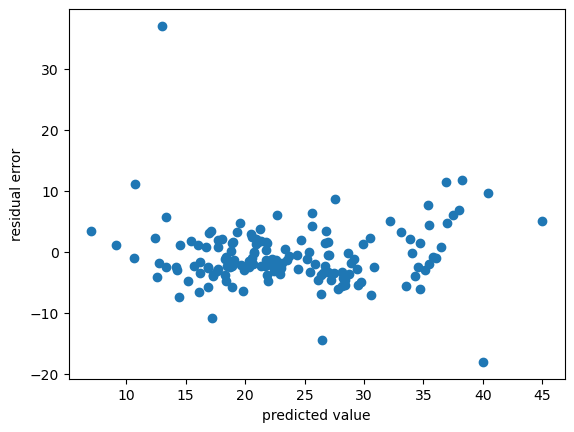

In [32]:
import matplotlib.pyplot as plt
plt.scatter(ypred,residual_error)
plt.xlabel('predicted value')
plt.ylabel("residual error")

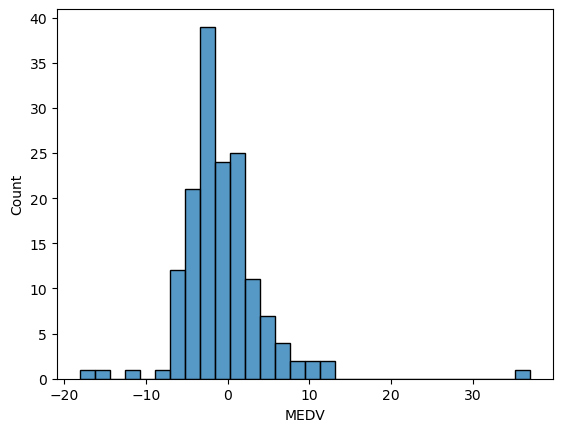

In [33]:
sb.histplot(residual_error)
plt.show()

<Axes: xlabel='MEDV', ylabel='Density'>

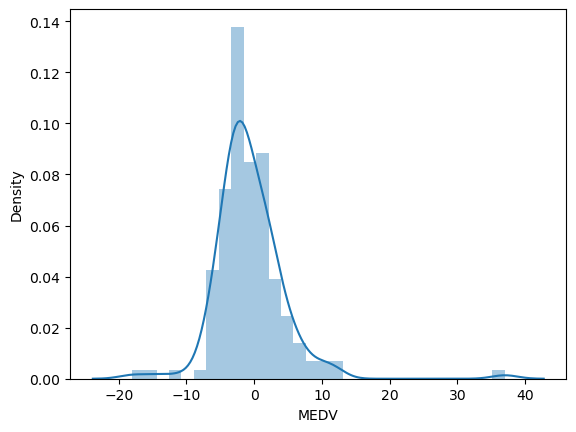

In [34]:
sb.distplot(residual_error)

<Axes: xlabel='MEDV', ylabel='Density'>

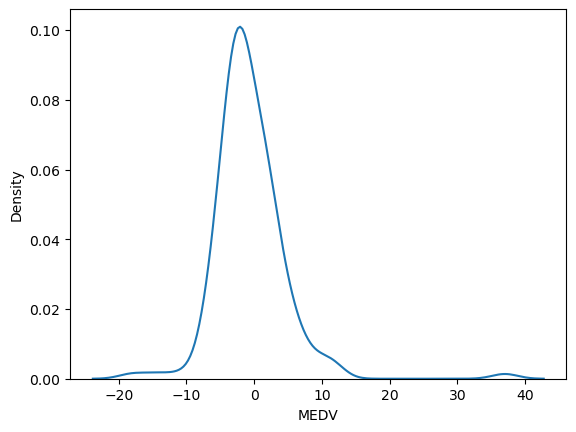

In [35]:
sb.distplot(residual_error,hist=False)

In [36]:
print(residual_error.skew())

2.3970283913445867


<Axes: >

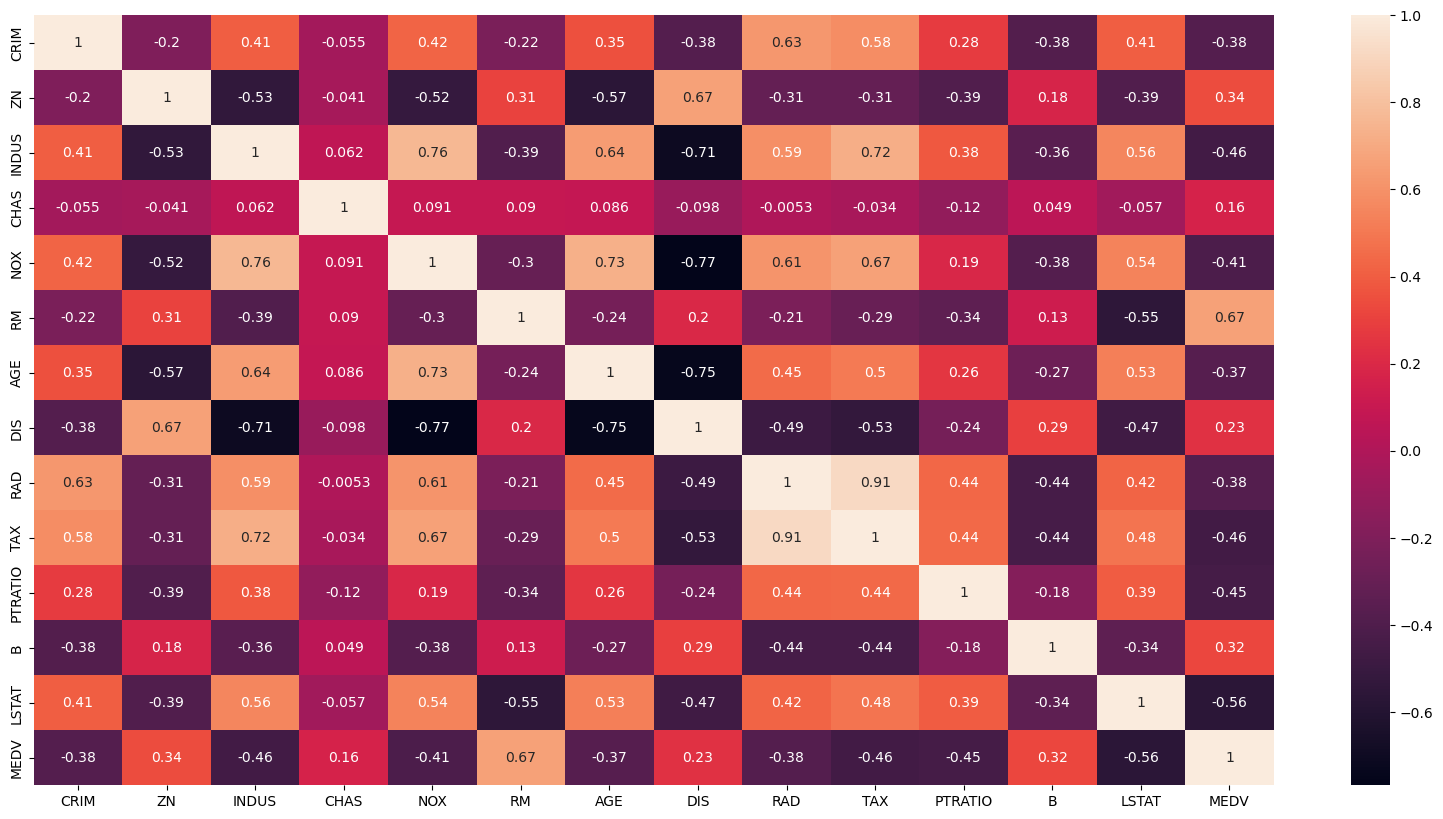

In [37]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot=True)

In [38]:
lr.score(X_train,Y_train)

0.5982820107541325

In [39]:
lr.score(X_test,Y_test)

0.6576900836441164

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [42]:
pf=PolynomialFeatures(2)

In [43]:
X_poly=pf.fit_transform(X)

In [44]:
#now we will train the dat with 70% and tses it will 30%
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [45]:
X_train.shape

(357, 105)

In [46]:
X_test.shape

(154, 105)

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

In [48]:
X_train

array([[ 0.        , -0.4299804 ,  0.63160121, ...,  0.17146083,
         0.32719222, -0.08396018],
       [ 0.        ,  0.96424356, -0.47229398, ..., -1.26503813,
        -0.13282254, -0.10862259],
       [ 0.        , -0.44689447,  2.83939158, ...,  0.50809565,
        -0.95205453, -0.56648084],
       ...,
       [ 0.        ,  0.23920306, -0.47229398, ...,  0.53304867,
         1.08732667,  0.33967757],
       [ 0.        , -0.41134534, -0.47229398, ...,  0.146572  ,
        -0.13685264, -0.31305552],
       [ 0.        , -0.44073013, -0.47229398, ...,  0.53304867,
        -0.34773006, -0.41843295]])

In [49]:
X_test=ss.transform(X_test)

In [50]:
X_test

array([[ 0.        , -0.42322322, -0.47229398, ...,  0.45161085,
         0.98348175,  0.28438082],
       [ 0.        , -0.44648359, -0.47229398, ...,  0.31460039,
        -0.1499    , -0.3321008 ],
       [ 0.        , -0.44907447,  3.5017287 , ...,  0.49026511,
        -0.4781194 , -0.45729461],
       ...,
       [ 0.        , -0.23486518, -0.47229398, ...,  0.3909024 ,
        -1.27987594, -0.60454343],
       [ 0.        , -0.33410269, -0.47229398, ...,  0.48674305,
         1.14036852,  0.3905535 ],
       [ 0.        , -0.37620826, -0.47229398, ...,  0.53304867,
        -0.41677524, -0.44050727]])

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
print("coefficent slope",lr.coef_)

coefficent slope [-6.67489049e+13  7.03521265e+01  3.48609379e+01 -7.32223674e+01
  9.15585349e+00  5.04278932e+01  4.19580185e+00  2.96197216e+01
 -2.03439394e+01  4.69314497e+01  5.01424986e+01  1.83837114e+00
  1.71068155e+01 -1.62660437e-02  3.12721782e+00 -9.48760316e-01
  1.07646120e+02 -1.32139761e-01 -8.72668115e+00  1.80025955e+01
 -9.90728370e+00 -4.38866030e+00  2.06087139e+02 -4.28727280e+02
  4.13029589e+01 -6.04368608e-01  3.07430884e+00 -2.06814130e+00
 -4.43222232e-01 -2.85403564e-01 -2.18596842e+01  4.89369613e+00
 -1.37524634e+00 -1.28296937e+01  1.84840760e-01 -1.67872369e+00
  6.38755887e+00 -6.61731121e+00 -9.77630584e-01  8.95555651e+00
 -3.66227101e+00  2.36134398e+01  6.44126562e+00  1.68063423e+00
  5.27785996e+00  2.19728371e+01  9.10748307e+00  1.88170408e+01
  1.15901354e+01 -6.34083220e+00  9.15585349e+00 -1.02181187e+01
 -6.95252054e+00  2.40800153e+00  1.20027557e+00 -1.14205020e+00
  1.33089366e+01 -1.55653855e+01  2.25351835e+00  8.82420134e-01
 -1.6066

In [53]:
print("intercept value:--",lr.intercept_)

intercept value:-- 22.54481792717099


In [54]:
y_pred=lr.predict(X_test)
y_pred

array([19.50902352, 26.68619852, 28.37857489, 27.51375493, 17.63448698,
       20.56725995, 28.71266182, 35.43927395, 11.09403585, 36.89697705,
       18.83643471, 46.14138657, 24.71358323, 14.31358186, 25.32404736,
       24.02781276, 22.07688084, 13.33484661, 23.06925829, 28.09145912,
       20.11973533, 34.72380744, 36.44934016, 22.5611941 , 20.43287961,
        8.21656748, 17.28700414,  8.95252313, 20.09829446, 18.6820118 ,
       18.40781266,  9.43596986, 16.66189044, 22.47244155, 20.31698998,
       12.5904714 ,  9.99184968, 17.73405481, 18.37470772, 32.8479818 ,
       25.35799942,  9.63339891, 16.51300048, 21.13730768, 44.74612658,
       41.37911947, 41.2625599 , 36.25106207, 29.17647305, 56.94927604,
       26.50447772, 16.67307478, 16.39731717, 18.58565474, 27.24883322,
       28.68868494, 23.24657728, 34.44657383, 21.2330399 , 31.8768168 ,
       40.86993194, 20.0395645 , 23.84868228, 20.88842245, 21.78264576,
       27.33075238, 59.90203505, 42.9823629 , 20.18204354, 24.15

In [55]:
dict={"Actual Output":Y_test,"Predict output":y_pred} #predict best fit line
df2=pd.DataFrame(dict)
df2

,Actual Output,Predict output
47,16.6,19.509024
345,17.5,26.686199
284,32.2,28.378575
221,21.7,27.513755
502,20.6,17.634487
...,...,...
95,28.4,24.534498
122,20.5,19.297610
162,50.0,50.537466
23,14.5,17.704850


In [56]:
from sklearn.metrics import mean_squared_error   

In [57]:
print("mean sqaured error",mean_squared_error(Y_test,y_pred)) 

mean sqaured error 41.58493118724267


In [58]:
mse=mean_squared_error(Y_test,y_pred)
print(mse)
#check for root of mean square  :--- error minmize error
rmse=np.sqrt(mse)
print("Root Mean Squared Error",rmse)

41.58493118724267
Root Mean Squared Error 6.44863793271437


In [59]:
from sklearn.metrics import r2_score
print('r2_score',r2_score(Y_test,y_pred))

r2_score 0.4853817412225373


In [60]:
residual_error=Y_test-y_pred
print('Residual error for each data points ',residual_error)

Residual error for each data points  47    -2.909024
345   -9.186199
284    3.821425
221   -5.813755
502    2.965513
         ...   
95     3.865502
122    1.202390
162   -0.537466
23    -3.204850
13     0.063714
Name: MEDV, Length: 154, dtype: float64


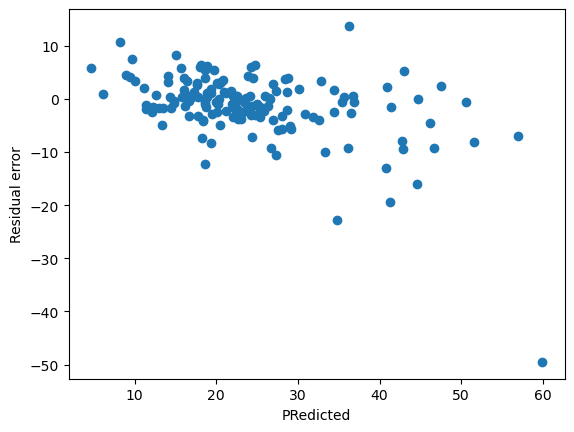

In [61]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(y_pred,residual_error,color='red')
plt.xlabel('PRedicted')
plt.ylabel('Residual error')
plt.show()

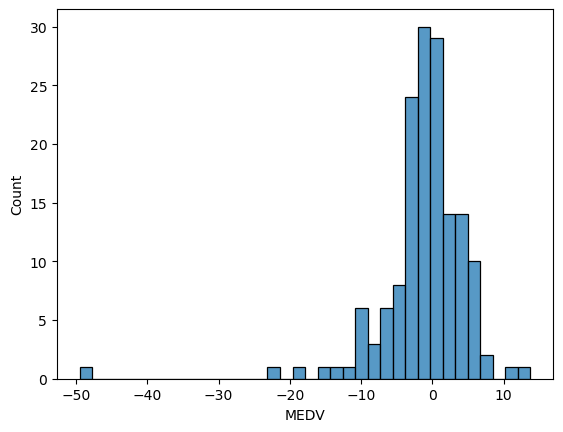

In [62]:
sb.histplot(residual_error)
plt.show()

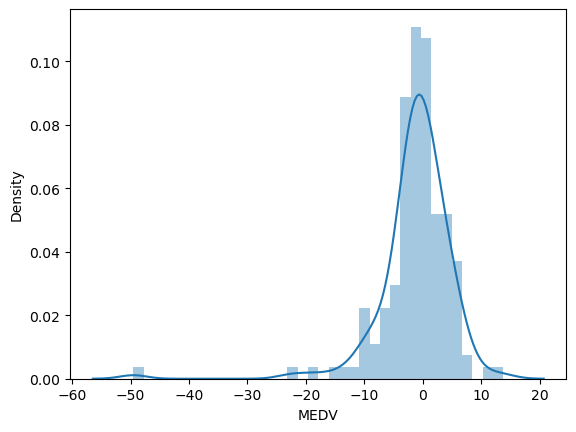

In [63]:
sb.distplot(residual_error,hist=True)
plt.show()

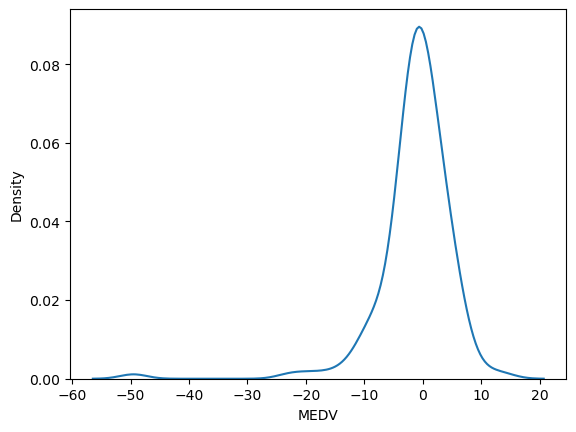

In [64]:
sb.distplot(residual_error,hist=False)
plt.show()

In [65]:
print(residual_error.skew())

-3.2936895769409404


In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
pf=PolynomialFeatures(2)

In [68]:
X_poly=pf.fit_transform(X)